# Migraine Prediction using Machine Learniing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import  SVR 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix ,classificatation_report
from sklearn.metrics import plot_confusion_matrix , precision_score, recall_score , f1_score
from sklearn.utils import resample

In [2]:
df = pd.read_csv('data.csv')

In [3]:
display(df.head(5))

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


## EDA (Exploratory Data Analysis)

In [4]:
#find out name of thecolumns
print(df.columns);

# The shape of the data 
print(df.shape)

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')
(400, 24)


In [5]:
#Now find out the maximum and minimum age  one who suffered from Migraine
# Minimum Age
print('Minimum Age :',df['Age'].min());
# Maximum age
print('Maximum Age : ',df['Age'].max())




Minimum Age : 15
Maximum Age :  77


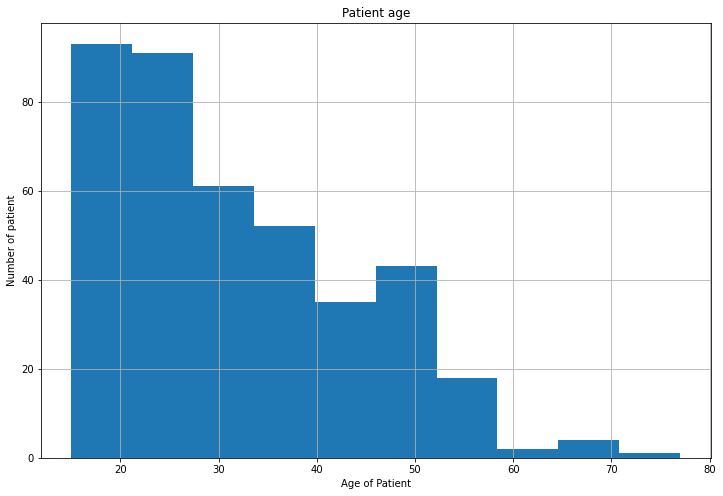

In [6]:
# now we plot graph(bar) to visualize the age of patient according to thier age
plt.figure(figsize =(12,8))
plt.title('Patient age')
df['Age'].hist()
plt.xlabel('Age of Patient')
plt.ylabel('Number of patient');




In [7]:
df['Character'].value_counts()

1    369
0     20
2     11
Name: Character, dtype: int64

In [8]:
df['Type'].value_counts()

Typical aura with migraine       247
Migraine without aura             60
Familial hemiplegic migraine      24
Typical aura without migraine     20
Basilar-type aura                 18
Other                             17
Sporadic hemiplegic migraine      14
Name: Type, dtype: int64

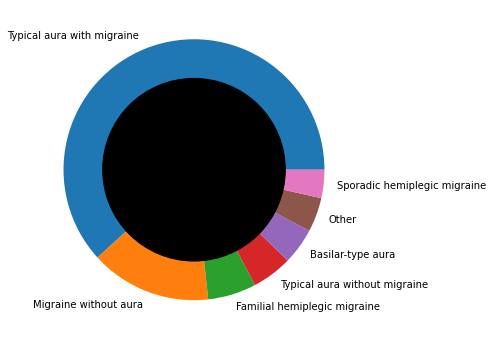

In [9]:
plt.figure(figsize =(14,6))
circle = plt.Circle((0,0), 0.7 , color = 'black')

plt.pie(df.Type.value_counts(), labels=['Typical aura with migraine ',      
                                         'Migraine without aura',             
                                         'Familial hemiplegic migraine',      
                                         'Typical aura without migraine ',    
                                         'Basilar-type aura',                 
                                         'Other',                             
                                         'Sporadic hemiplegic migraine'])

p = plt.gcf()
p.gca().add_artist(circle);

#### From the visualization we can easily find out the common migrain type 

##### Insight : Typical aura with migraine is a common symptoms in Migrain 

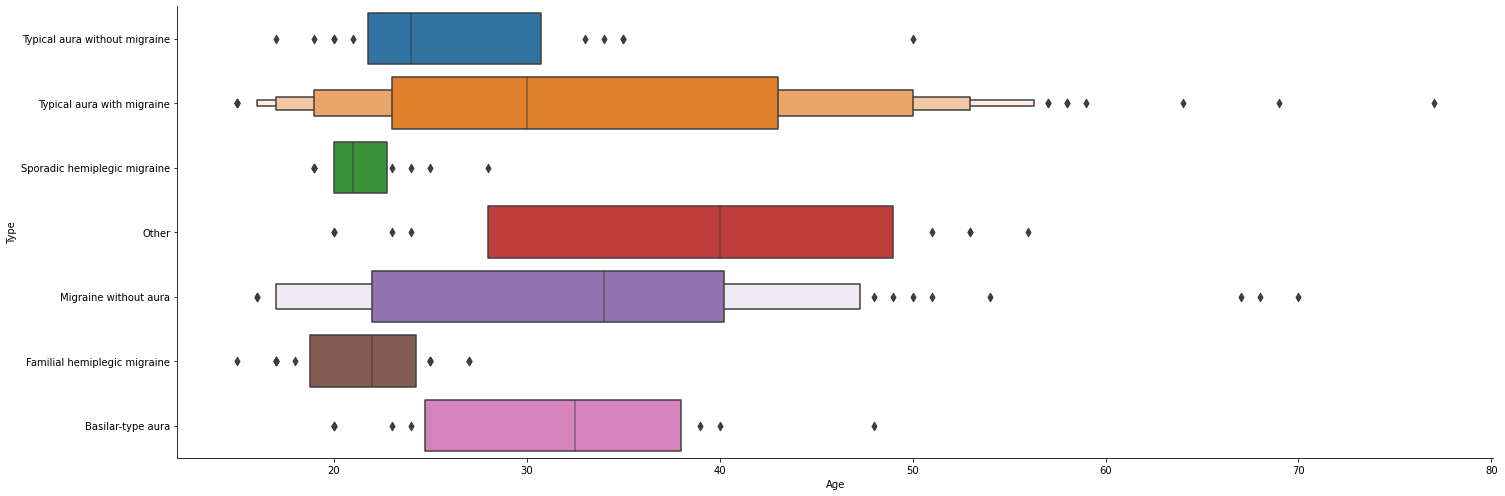

In [10]:
sns.catplot(y = 'Type' ,x = 'Age', data = df.sort_values('Type' , ascending = False),
           kind = 'boxen',height = 7 ,aspect = 3);

In [11]:
# 7 different type so we need to divide it into 7 DF
data_1 = df[df['Type'] == 'Typical aura with migraine']
data_2 = df[df['Type'] == 'Migraine without aura']
data_3 = df[df['Type'] == 'Familial hemiplegic migraine']
data_4 = df[df['Type'] == 'Typical aura without migraine']
data_5 = df[df['Type'] == 'Basilar-type aura']
data_6 = df[df['Type'] == 'Other']
data_7 = df[df['Type'] == 'Sporadic hemiplegic migraine']


In [12]:
data_1_resample = resample(data_1, n_samples = 200, random_state =123 ,replace =True)

data_2_resample = resample(data_2, n_samples = 200,random_state =123 ,replace =True)

data_3_resample = resample(data_3, n_samples = 200,random_state =123 ,replace =True)

data_4_resample = resample(data_4, n_samples = 200, random_state =123 ,replace =True)

data_5_resample = resample(data_5, n_samples = 565, random_state =1000 ,replace =True)

data_6_resample = resample(data_6, n_samples = 200, random_state =123 ,replace =True)

data_7_resample = resample(data_7, n_samples = 200, random_state =123 ,replace =True)


In [13]:
train_dataset = pd.concat([data_1_resample ,data_2_resample,data_3_resample,
                          data_4_resample,data_5_resample,data_6_resample,data_7_resample])

In [14]:
train_dataset.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
156,30,3,4,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
173,27,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
113,35,3,5,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine
282,17,2,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
145,30,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine


In [15]:
df.shape

(400, 24)

In [16]:
train_dataset.shape

(1765, 24)

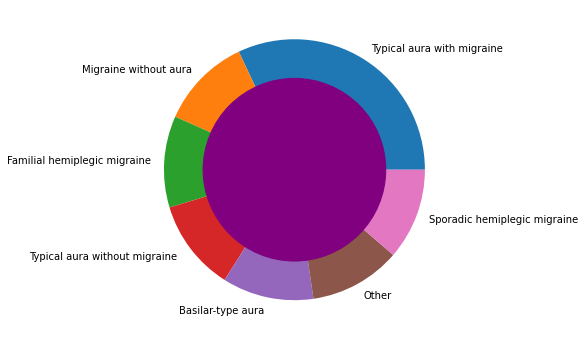

In [17]:
plt.figure(figsize =(14,6))
circle = plt.Circle((0,0), 0.7 , color = 'purple')

plt.pie(train_dataset.Type.value_counts(), labels=['Typical aura with migraine ',      
                                         'Migraine without aura',             
                                         'Familial hemiplegic migraine',      
                                         'Typical aura without migraine ',    
                                         'Basilar-type aura',                 
                                         'Other',                             
                                         'Sporadic hemiplegic migraine'])

p = plt.gcf()
p.gca().add_artist(circle);

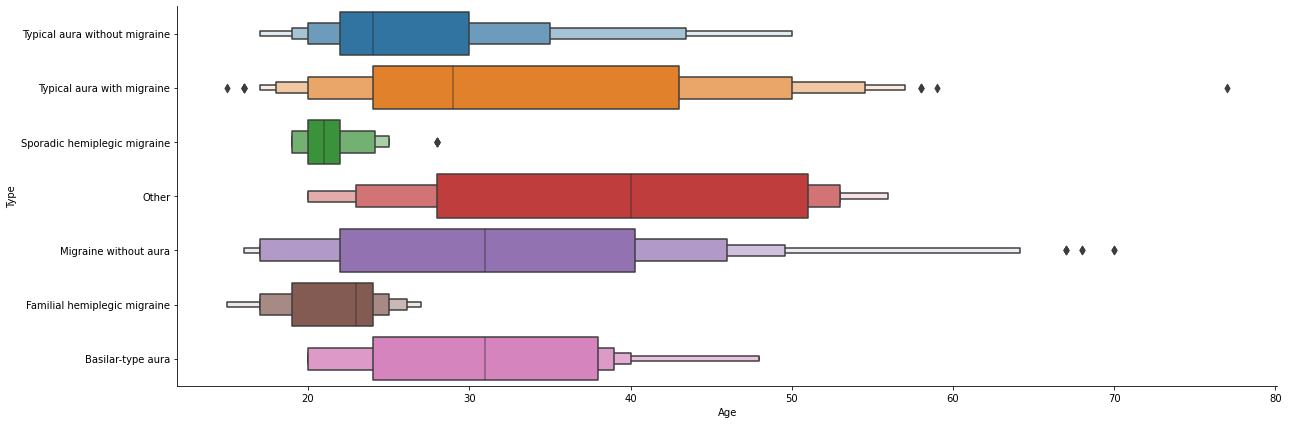

In [18]:
#plot categorical distribution plots
sns.catplot(y = 'Type' ,x = 'Age', data = train_dataset.sort_values('Type' , ascending = False),
           kind = 'boxen',height = 6,aspect = 3 );

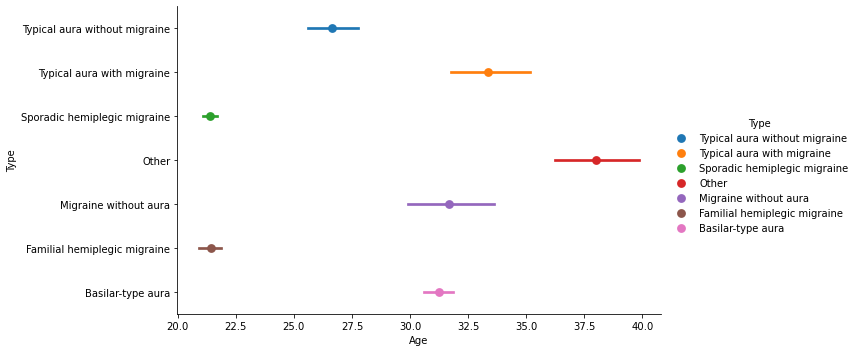

In [19]:
# using point (catergorical estimate plot) 
sns.catplot(y = 'Type' ,x = 'Age', data = train_dataset.sort_values('Type' , ascending = False),
            hue= 'Type' , kind = 'point',height = 5,aspect = 2 );

## Selecting X & Y variables

In [20]:
X = train_dataset.drop('Type', axis =1)
Y = train_dataset['Type']

In [21]:
X.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
156,30,3,4,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
173,27,1,1,1,1,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
113,35,3,5,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
282,17,2,2,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
145,30,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
Y.head(2)

156    Typical aura with migraine
173    Typical aura with migraine
Name: Type, dtype: object

## Data Spliting (Split into test & train set)

In [23]:
X_train ,X_test , Y_train ,Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state =123)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1323, 23)
(442, 23)
(1323,)
(442,)


## Applying Machine Learning Models

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [25]:
dt = DecisionTreeClassifier()

dt.fit(X_train ,Y_train)

DecisionTreeClassifier()

In [26]:
rf.get_params(deep = True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
y_hat = rf.predict(X_test)
y_hat[:7]

array(['Other', 'Migraine without aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Familial hemiplegic migraine'],
      dtype=object)

In [28]:
print('Accuracy of Randomforest on Training Data :' ,rf.score(X_train,Y_train))
print('Accuracy of Randomforest on Training Data :',rf.score(X_test ,Y_test))

Accuracy of Randomforest on Training Data : 1.0
Accuracy of Randomforest on Training Data : 1.0


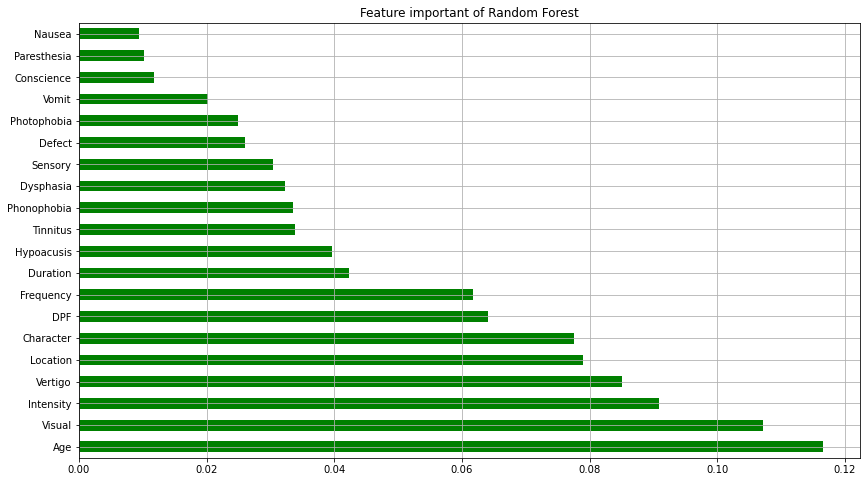

In [29]:
plt.figure(figsize= (14,8))
plt.title('Feature important of Random Forest')
imz = pd.Series(rf.feature_importances_, index =X.columns)
imz.nlargest(20).plot(kind = 'barh' , color ='green');
plt.grid()

In [33]:
def get_scores(clf):
    model = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    
    print('** Classification Results of Classifcation Model After Training **')
    print('==================================================================')
    
    print('Accuracy of Classifier on training dataset : %.3f'%rf.score(X_train, Y_train))
    print('Accuracy of Classifier on test dataset : %.3f'%rf.score(X_test,Y_test))
    print('Precision of classifier : %.3f'%precision_score(Y_test ,y_pred ,average = 'weighted'))
    print('Recall of classifier : %.3f'%recall_score(Y_test ,y_pred ,average = 'weighted'))
    print('F1 score of Classifier : %.3f'%f1_score(Y_test ,y_pred ,average = 'weighted'))
    
    
    

In [34]:
get_scores(rf)

** Classification Results of Classifcation Model After Training **
Accuracy of Classifier on training dataset : 1.000
Accuracy of Classifier on test dataset : 1.000
Precision of classifier : 1.000
Recall of classifier : 1.000
F1 score of Classifier : 1.000
